In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv("dataset.csv")

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.drop(columns=["customerID"], inplace=True)

In [44]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [46]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [47]:
df.shape

(7043, 20)

In [48]:
df.iloc[488]["TotalCharges"]

' '

In [49]:
df1=df[df.TotalCharges!=' ']

In [50]:
df1.shape

(7032, 20)

In [51]:
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28332\3157282470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges= pd.to_numeric(df1.TotalCharges)


In [52]:
df1.TotalCharges.dtypes

dtype('float64')

In [53]:
tenure_no=df1[df1["Churn"]=="No"].tenure
tenure_yes=df1[df1["Churn"]=="Yes"].tenure

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

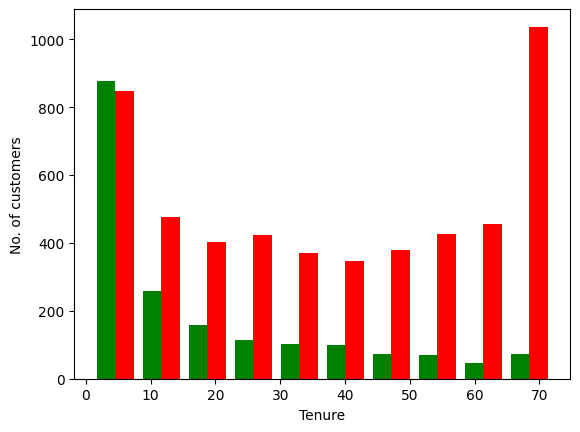

In [54]:
plt.xlabel("Tenure")
plt.ylabel("No. of customers")

plt.hist([tenure_yes, tenure_no], color=["green", "red"])

In [55]:
def print_unique(df1):
    for i in df1:
        if df1[i].dtypes=="object":
            print(f'{i}  {df1[i].unique()}')

In [56]:
print_unique(df1)

gender  ['Female' 'Male']
Partner  ['Yes' 'No']
Dependents  ['No' 'Yes']
PhoneService  ['No' 'Yes']
MultipleLines  ['No phone service' 'No' 'Yes']
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  ['No' 'Yes' 'No internet service']
OnlineBackup  ['Yes' 'No' 'No internet service']
DeviceProtection  ['No' 'Yes' 'No internet service']
TechSupport  ['No' 'Yes' 'No internet service']
StreamingTV  ['No' 'Yes' 'No internet service']
StreamingMovies  ['No' 'Yes' 'No internet service']
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  ['Yes' 'No']
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  ['No' 'Yes']


In [57]:
def convert_to_no(text):
    if text=='Yes'or text=='No':
        return text
    else:
        return 'No'

In [58]:
df1['MultipleLines']=df1["MultipleLines"].apply(convert_to_no)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28332\3898224169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['MultipleLines']=df1["MultipleLines"].apply(convert_to_no)


In [59]:
df1["MultipleLines"].unique()

array(['No', 'Yes'], dtype=object)

In [60]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28332\4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_28332\4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [61]:
print_unique(df1)

gender  ['Female' 'Male']
Partner  ['Yes' 'No']
Dependents  ['No' 'Yes']
PhoneService  ['No' 'Yes']
MultipleLines  ['No' 'Yes']
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  ['No' 'Yes']
OnlineBackup  ['Yes' 'No']
DeviceProtection  ['No' 'Yes']
TechSupport  ['No' 'Yes']
StreamingTV  ['No' 'Yes']
StreamingMovies  ['No' 'Yes']
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  ['Yes' 'No']
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  ['No' 'Yes']


In [62]:
df1.replace({"Yes":1,"No":0}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28332\2835480986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({"Yes":1,"No":0}, inplace=True)


In [64]:
df1['Partner'].unique()

array([1, 0], dtype=int64)

In [65]:
df1.replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28332\1755443310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Female':1, 'Male':0}, inplace=True)


In [68]:
df2=pd.get_dummies(data=df1, columns=["InternetService", "Contract", "PaymentMethod"])

In [69]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [70]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [73]:
cols=["TotalCharges", "MonthlyCharges", "tenure"]

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2[cols]=sc.fit_transform(df2[cols])

In [75]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.280248,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.064303,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,-1.239504,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.512486,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,-1.239504,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [76]:
y=df2["Churn"]

In [78]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [79]:
x=df2.drop(columns=["Churn"])

In [80]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.280248,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.064303,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,-1.239504,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.512486,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,-1.239504,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,-0.343137,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.612573,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,-0.872808,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,-1.158016,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test=train_test_split(x,y,test_size=0.2, random_state=0)